In [7]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torch.optim as optim
import torchvision.models as models
from PIL import Image
from tqdm import tqdm

In [2]:
model =models.vgg19(pretrained=True).features

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:03<00:00, 158MB/s]


In [3]:
class Vgg(nn.Module):
  def __init__(self):
    super().__init__()
    self.model=models.vgg19(pretrained=True).features
    self.features=[0,5,10,19,28]
  def forward(self,x):
    features_out=[]
    for  layer_num ,layer in enumerate(self.model):
      x=layer(x)
      if layer_num in self.features :
        features_out.append(x)
    return features_out


In [4]:
def load_image(image_path,loader,device):
  image=Image.open(image_path)
  image=loader(image)
  return image.unsqueeze(0).to(device)


In [23]:
image_size=512
device="cuda" if torch.cuda.is_available else "cpu"
loader=transforms.Compose([transforms.Resize((image_size,image_size)),transforms.ToTensor()])
content_image=load_image("/content/annahathaway.png",loader,device)
style_image=load_image("style.jpg",loader,device)
genrated_image=content_image.clone().requires_grad_(True)
model=Vgg().to(device)
epoches=1000
model=Vgg().to(device)
for epoch in tqdm(range(epoches)) :
  content_features=model(content_image)
  style_features=model(style_image)
  generated_features =model(genrated_image)
  content_loss=style_loss=0
  alpha=1
  beta=0.1
  optimizer=optim.Adam([genrated_image],lr=0.01)
  for content_feature,style_feature,generated_feature in zip(content_features,style_features,generated_features):
    bs,channel,width,height=generated_feature.shape

    content_loss+=torch.mean((content_feature-generated_feature)**2)
    gen_gram_matrix=generated_feature.view(channel,width*height).mm(generated_feature.view(channel,width*height).t())
    style_gram_matrix=style_feature.view(channel,width*height).mm(style_feature.view(channel,width*height).t())
    style_loss+=torch.mean((style_gram_matrix-gen_gram_matrix)**2)
  loss=alpha*content_loss+beta*style_loss
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()






/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 1000/1000 [05:27<00:00,  3.05it/s]


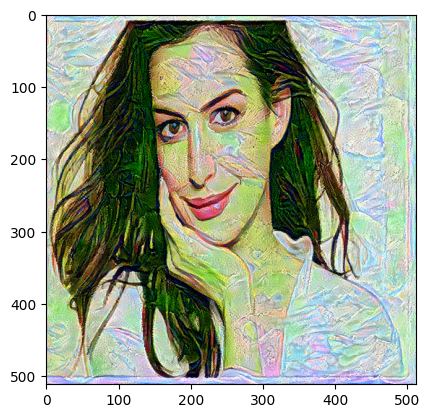

In [28]:
# import matplotlib.pyplot as plt
# genrated_image=genrated_image[0].permute(1,2,0)
# genrated_image=genrated_image.to("cpu").detach().numpy()
plt.imshow(genrated_image)

In [27]:
genrated_image.shape

(512, 512, 3)